In [4]:
import graspy
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from graspy.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05],
     [0.1, 0.4, 0.15],
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)
from graspy.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

In [6]:
X.shape

(150, 3)

# With seaborn and KDE

[0.2496271  0.38323417]
[[-0.93621686  0.35142281]
 [ 0.35142281  0.93621686]]
[0.21175665 0.31277482]
[[ 0.61749312 -0.78657628]
 [-0.78657628 -0.61749312]]
[0.19071169 0.4360354 ]
[[-9.99999955e-01  2.99070193e-04]
 [ 2.99070193e-04  9.99999955e-01]]


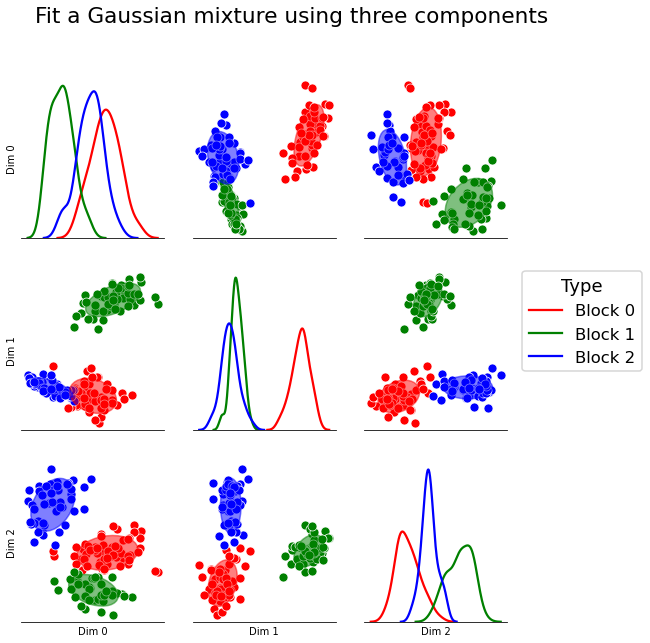

In [14]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns

color_iter = {0:'red', 1: 'green', 2: 'blue'}


def plot_results(X):
    f, axes = plt.subplots(3,3, figsize=(10, 10))
    
    sns.despine(left=True)
    with sns.plotting_context(context='talk', font_scale=1): 
        counter = 1
        for k in range(X.shape[1]):
            for j in range(X.shape[1]): 
                if k == j: 
                    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
                    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
                    sns.kdeplot(X[Y_ == 0, k], color=color_iter[0], ax=axes[k, k])
                    sns.kdeplot(X[Y_ == 1, k], color=color_iter[1],  ax=axes[k, k])
                    sns.kdeplot(X[Y_ == 2, k], color=color_iter[2], ax=axes[k, k])
                    axes[k,j].set_xticks([])
                    axes[k,j].set_yticks([])
                    axes[k,j].set_ylabel(None)
                    axes[k,j].set_ylabel(j)
                    axes[k,j].set_xlabel(k)
                    #ax.plot(X[:, k])
                else:   
                    A = np.transpose(np.vstack(((X[:, j]),(X[:, k]))))
                    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(A)
                    Y_, means, covariances = gmm.predict(A), gmm.means_, gmm.covariances_
                    for i, (mean, covar) in enumerate(zip(
                            means, covariances)):

                        v, w = linalg.eigh(covar)
                        v = 2. * np.sqrt(2.) * np.sqrt(v)
                        u = w[0] / linalg.norm(w[0])
                        
                        if k ==2 and j == 1: 
                            print(v)
                            print(w)
                        # as the DP will not use every component it has access to
                        # unless it needs it, we shouldn't plot the redundant
                        # components.
                        if not np.any(Y_ == i):
                            continue
                        sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k, j] )

                        # Plot an ellipse to show the Gaussian component
                        angle = np.arctan(u[1] / u[0])
                        angle = 180. * angle / np.pi  # convert to degrees
                        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color_iter[i])
                        ell.set_clip_box(axes[k,j].bbox)
                        ell.set_alpha(0.5)
                        axes[k,j].add_artist(ell)
                        axes[k,j].set_xticks([])
                        axes[k,j].set_yticks([])
                        axes[k,j].set_ylabel(k)
                        axes[k,j].set_xlabel(k)
                counter += 1

        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                axes[i,j].set_ylabel("Dim " + str(i))
                axes[i,j].set_xlabel("Dim " + str(j))

        for ax in axes.flat:
            ax.label_outer()
        f.suptitle("Fit a Gaussian mixture using three components")
        f.legend(labels=['Block {}'.format(i) for i in range(X.shape[1])],
           loc="right",   # Position of legend
         # Small spacing around legend box
           title="Type"  # Title for the legend
           )
        plt.subplots_adjust(right=.8)

   
#Fit a Gaussian mixture with EM using three components
plot_results(X)

[0.18545582 0.25814888 0.40926875]
[[ 0.94280263  0.25507018  0.21462155]
 [ 0.31355914 -0.89711499 -0.31123202]
 [ 0.11315421  0.36072691 -0.92578195]]
[0.15635667 0.24018048 0.3346163 ]
[[ 0.71722642 -0.53459531  0.44698334]
 [-0.61117208 -0.17445565  0.77203233]
 [ 0.33474609  0.82690572  0.45185393]]
[0.1329213  0.21382672 0.42304467]
[[ 0.77223757 -0.61177588  0.17140423]
 [ 0.62387827  0.78119612 -0.02255076]
 [-0.12010431  0.12434992  0.98494266]]


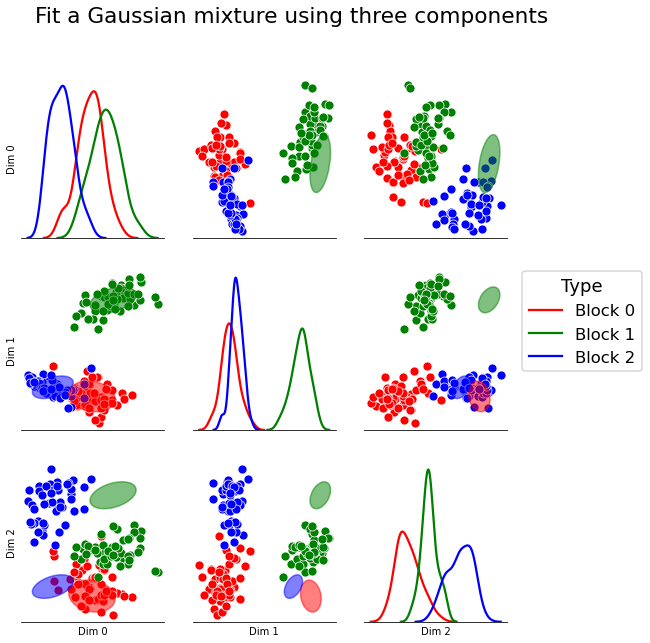

In [13]:
def plot_results(X, gmm):
    f, axes = plt.subplots(3,3, figsize=(10, 10))    
    sns.despine(left=True)
    with sns.plotting_context(context='talk', font_scale=1): 
        counter = 1
        Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
        for k in range(X.shape[1]):
            for j in range(X.shape[1]): 
                if k == j:       
                    sns.kdeplot(X[Y_ == 0, k], color=color_iter[0], ax=axes[k, k])
                    sns.kdeplot(X[Y_ == 1, k], color=color_iter[1],  ax=axes[k, k])
                    sns.kdeplot(X[Y_ == 2, k], color=color_iter[2], ax=axes[k, k])
                    axes[k,j].set_xticks([])
                    axes[k,j].set_yticks([])
                    axes[k,j].set_ylabel(None)
                    axes[k,j].set_ylabel(j)
                    axes[k,j].set_xlabel(k)
                    #ax.plot(X[:, k])
                else:   
                    for i, (mean, covar) in enumerate(zip(
                            means, covariances)):

                        v, w = linalg.eigh(covar)
                        v = 2. * np.sqrt(2.) * np.sqrt(v)
                        u = w[0] / linalg.norm(w[0])
                        
                        if k ==2 and j == 1: 
                            print(v)
                            print(w)
                        # as the DP will not use every component it has access to
                        # unless it needs it, we shouldn't plot the redundant
                        # components.
                        if not np.any(Y_ == i):
                            continue
                        sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k, j] )

                        # Plot an ellipse to show the Gaussian component
                        angle = np.arctan(u[1] / u[0])
                        angle = 180. * angle / np.pi  # convert to degrees
                        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color_iter[i])
                        ell.set_clip_box(axes[k,j].bbox)
                        ell.set_alpha(0.5)
                        axes[k,j].add_artist(ell)
                        axes[k,j].set_xticks([])
                        axes[k,j].set_yticks([])
                        axes[k,j].set_ylabel(k)
                        axes[k,j].set_xlabel(k)
                counter += 1

        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                axes[i,j].set_ylabel("Dim " + str(i))
                axes[i,j].set_xlabel("Dim " + str(j))

        for ax in axes.flat:
            ax.label_outer()
        f.suptitle("Fit a Gaussian mixture using three components")
        f.legend(labels=['Block {}'.format(i) for i in range(X.shape[1])],
           loc="right",   # Position of legend
         # Small spacing around legend box
           title="Type"  # Title for the legend
           )
        plt.subplots_adjust(right=.8)

   
#Fit a Gaussian mixture with EM using three components
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, gmm)

## this is with one single fit 

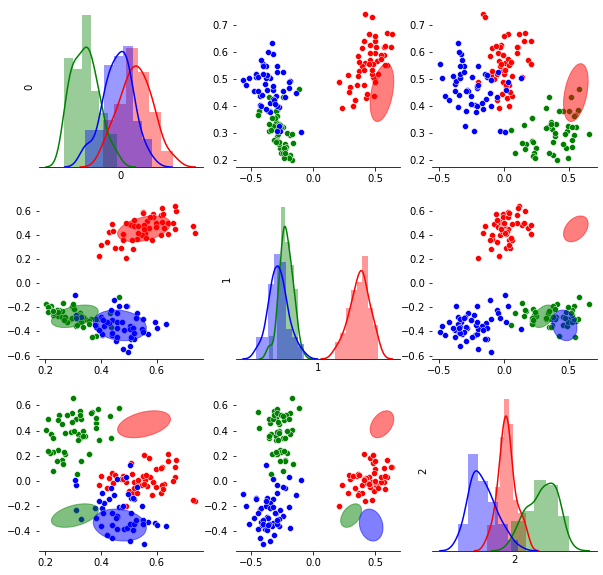

In [8]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns

color_iter = {0:'red', 1: 'green', 2: 'blue'}


def plot_results(X, gmm):
    f, axes = plt.subplots(3,3, figsize=(10, 10))    
    sns.despine(left=True)
    counter = 1
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):
            
            if k == j: 
                #gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
                
                sns.distplot(X[Y_ == 0, k], kde=True, color=color_iter[0], ax=axes[k, k])
                sns.distplot(X[Y_ == 1, k], kde=True, color=color_iter[1],  ax=axes[k, k])
                sns.distplot(X[Y_ == 2, k], kde=True, color=color_iter[2], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
                #ax.plot(X[:, k])
            else:   
                
                for i, (mean, covar) in enumerate(zip(
                        means, covariances)):
                   
                    v, w = linalg.eigh(covar)
                    v = 2. * np.sqrt(2.) * np.sqrt(v)
                    u = w[0] / linalg.norm(w[0])
                    
                    # as the DP will not use every component it has access to
                    # unless it needs it, we shouldn't plot the redundant
                    # components.
                    if not np.any(Y_ == i):
                        continue
                    sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k,j] )

                    # Plot an ellipse to show the Gaussian component
                    angle = np.arctan(u[1] / u[0])
                    angle = 180. * angle / np.pi  # convert to degrees
                    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color_iter[i])
                    ell.set_clip_box(axes[k,j].bbox)
                    ell.set_alpha(0.5)
                    axes[k,j].add_artist(ell)


            counter += 1

#rotate axes
   
#Fit a Gaussian mixture with EM using three components
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, gmm)

[0.00220851 0.00571523 0.02237085]
[[ 0.77223757 -0.61177588  0.17140423]
 [ 0.62387827  0.78119612 -0.02255076]
 [-0.12010431  0.12434992  0.98494266]]
[0.00305593 0.00721083 0.01399601]
[[ 0.71722642 -0.53459531  0.44698334]
 [-0.61117208 -0.17445565  0.77203233]
 [ 0.33474609  0.82690572  0.45185393]]
[0.00429923 0.00833011 0.02093761]
[[ 0.94280263  0.25507018  0.21462155]
 [ 0.31355914 -0.89711499 -0.31123202]
 [ 0.11315421  0.36072691 -0.92578195]]


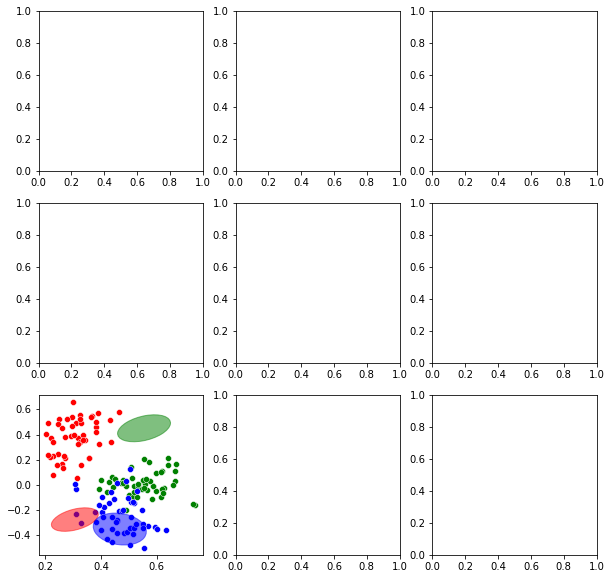

In [64]:
f, axes = plt.subplots(3,3, figsize=(10, 10)) 
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
k = 2 # outter loop dictates y 
j = 0 #inner loop dictates x 
for i, (mean, covar) in enumerate(zip(means, covariances)):
    v, w = linalg.eigh(covar)
    print(v)
    print(w)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])
    if not np.any(Y_ == i):
        continue
    sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k,j] )
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color_iter[i])
    ell.set_clip_box(axes[k,j].bbox)
    ell.set_alpha(0.5)
    axes[k,j].add_artist(ell)


In [61]:
print(means) 

[[ 0.30576366 -0.27408327  0.37472753]
 [ 0.55487246  0.45045675  0.01088958]
 [ 0.46756922 -0.34939845 -0.23957977]]


In [62]:
print(covariances)

[[[ 0.00411333 -0.00175386  0.0031371 ]
  [-0.00175386  0.0043588  -0.00010718]
  [ 0.0031371  -0.00010718  0.02182246]]

 [[ 0.00642913  0.00416276  0.00037286]
  [ 0.00416276  0.00970304  0.00321702]
  [ 0.00037286  0.00321702  0.0081306 ]]

 [[ 0.00532789 -0.00203377 -0.00293504]
  [-0.00203377  0.00915502  0.00348962]
  [-0.00293504  0.00348962  0.01908404]]]


[ 0.53143573 -0.005976  ]
[0.00715206 0.01034233]
[[-0.83789416  0.54583274]
 [ 0.54583274  0.83789416]]
[0.30554001 0.37562386]
[0.00354039 0.02225091]
[[-0.98481237  0.17362201]
 [ 0.17362201  0.98481237]]
[ 0.47392007 -0.30342349]
[0.00392758 0.00915928]
[[-0.86816423 -0.49627701]
 [-0.49627701  0.86816423]]


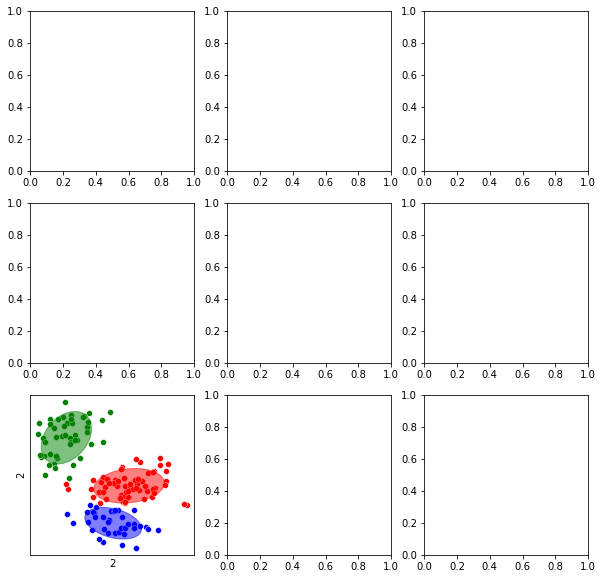

In [69]:
f, axes = plt.subplots(3,3, figsize=(10, 10))
k = 2
j = 0
A = np.transpose(np.vstack(((X[:, j]),(X[:, k]))))
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(A)
Y_, means, covariances = gmm.predict(A), gmm.means_, gmm.covariances_
for i, (mean, covar) in enumerate(zip( means, covariances)):  
    print(mean)
    v, w = linalg.eigh(covar)
    print(v)
    print(w)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])
    # as the DP will not use every component it has access to
    # unless it needs it, we shouldn't plot the redundant
    # components.
    if not np.any(Y_ == i):
        continue
    sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k, j] )

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color_iter[i])
    ell.set_clip_box(axes[k,j].bbox)
    ell.set_alpha(0.5)
    axes[k,j].add_artist(ell)
    axes[k,j].set_xticks([])
    axes[k,j].set_yticks([])
    axes[k,j].set_ylabel(k)
    axes[k,j].set_xlabel(k)

In [73]:
print(covariances)

[[[ 0.00810255  0.00145907]
  [ 0.00145907  0.00939184]]

 [[ 0.00410442  0.00319922]
  [ 0.00319922  0.02168689]]

 [[ 0.0052161  -0.00225408]
  [-0.00225408  0.00787076]]]


In [74]:
print(means)

[[ 0.53143573 -0.005976  ]
 [ 0.30554001  0.37562386]
 [ 0.47392007 -0.30342349]]
